In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

In [33]:
# generate data with four clusters in a 3D space
from sklearn.datasets import make_blobs

centers = [ [ 2, -6, -6],
            [-1,  9,  4],
            [-8,  7,  2],
            [ 4,  7,  9] ]

cluster_std = [1.0, 2.5, 0.5, 3.0]
X, y = make_blobs(n_samples=600, centers=centers, n_features=3, cluster_std=cluster_std,random_state=42)

In [34]:
df = pd.DataFrame(X, columns=["x", "y", "z"])
px.scatter_3d(df, x="x", y="y", z="z", title="3D scatter plot", opacity=0.7, color=y.astype(str), color_discrete_sequence=px.colors.qualitative.G10)

In [35]:
from sklearn.preprocessing import StandardScaler

sclaer = StandardScaler()
X_std = sclaer.fit_transform(X)

/Users/user/miniconda3/envs/py312/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



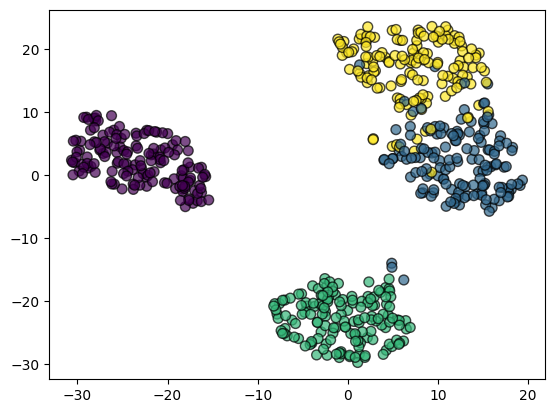

In [36]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=500)
X_tsne = tsne.fit_transform(X_std)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, s=50, alpha=0.7, edgecolors='k')

/Users/user/miniconda3/envs/py312/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/user/miniconda3/envs/py312/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



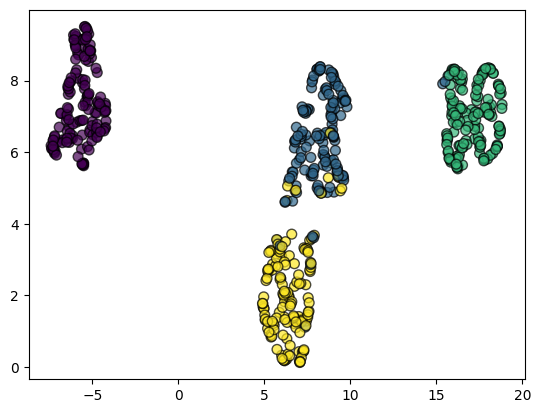

In [39]:
from umap.umap_ import UMAP

umap = UMAP(n_components=2, random_state=42, n_neighbors=10, min_dist=0.1, spread=1.0, metric='euclidean')
X_umap = umap.fit_transform(X_std)

plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, s=50, alpha=0.7, edgecolors='k')

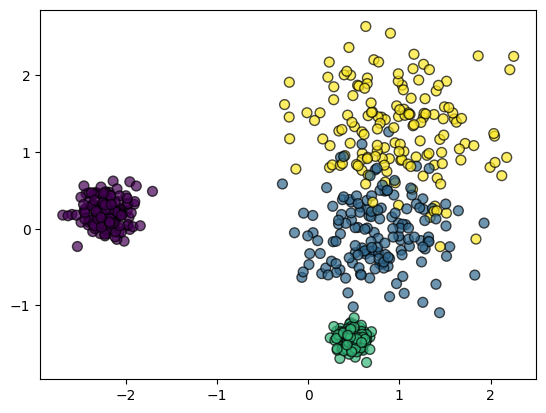

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_std)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=50, alpha=0.7, edgecolors='k')